_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

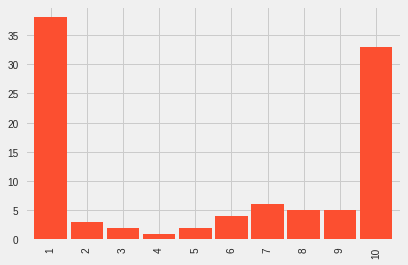

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11)) # index will start from 0 if not for this

fake.plot.bar(color='C1', width=0.9);

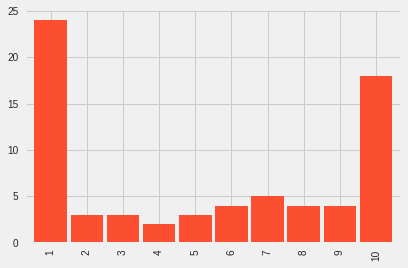

In [3]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

In [5]:
display(example)

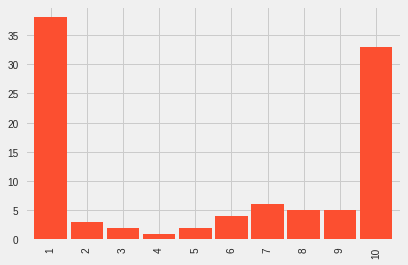

In [6]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11)) # index will start from 0 if not for this

fake.plot.bar(color='C1', width=0.9);

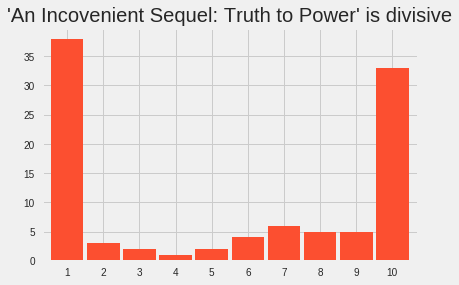

In [10]:
# rotate x axis numbers

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11)) # index will start from 0 if not for this

ax = fake.plot.bar(color='C1', width=0.9)

ax.tick_params(labelrotation=0) #to unrotate or remove the rotation

ax.set(title="'An Incovenient Sequel: Truth to Power' is divisive"); 
#or '\'An Incovenient Sequel: Truth to Power\' is divisive'



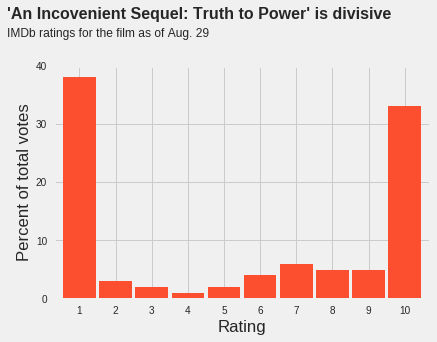

In [29]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11)) # index will start from 0 if not for this

ax = fake.plot.bar(color='C1', width=0.9)

ax.tick_params(labelrotation=0) 

ax.text(x=-2,y=48,s="'An Incovenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')

ax.text(x=-2,y=45, s='IMDb ratings for the film as of Aug. 29',
       fontsize=12)

ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
      yticks=range(0,50,10)); 
#(start pt., end pt., increment)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [32]:
df.shape

(80053, 27)

In [31]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [35]:
width,height = df.shape
width*height

2161431

In [37]:
pd.options.display.max_columns = 500
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [38]:
df.sample(1).T

,18834
timestamp,2017-08-07 13:40:06.980510
respondents,1796
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.3
mean,5.6
median,7
1_votes,742
2_votes,40
3_votes,23


In [39]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-15 01:10:04.918932
freq                               1
Name: timestamp, dtype: object

In [0]:
# convert timestamp to date time

df.timestamp = pd.to_datetime(df.timestamp)

In [41]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
# Making datetime index of your df

df = df.set_index('timestamp')

In [43]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [44]:
df['2017-08-09']
# everything from this date

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-09 00:00:02.303255,1225,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.9,5.2,4,549,37,20,7,15,29,37,39,58,434,44.8,3.0,1.6,0.6,1.2,2.4,3.0,3.2,4.7,35.4
2017-08-09 00:00:02.545069,184,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.7,7.1,10,44,2,3,3,2,3,7,8,16,96,23.9,1.1,1.6,1.6,1.1,1.6,3.8,4.3,8.7,52.2
2017-08-09 00:00:02.797166,10,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,2.7,4.1,1,6,0,0,0,1,0,0,0,0,3,60.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,30.0
2017-08-09 00:00:03.079827,8,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,3.4,4.9,3,4,0,0,0,1,0,0,0,0,3,50.0,0.0,0.0,0.0,12.5,0.0,0.0,0.0,0.0,37.5
2017-08-09 00:00:03.342268,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-09 00:00:03.534438,334,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.1,6.6,9,102,1,5,4,4,13,11,14,16,164,30.5,0.3,1.5,1.2,1.2,3.9,3.3,4.2,4.8,49.1
2017-08-09 00:00:03.799538,298,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.1,6.5,9,96,1,3,3,3,11,11,11,16,143,32.2,0.3,1.0,1.0,1.0,3.7,3.7,3.7,5.4,48.0
2017-08-09 00:00:03.977885,29,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,6.5,7.6,10,4,0,2,1,1,1,0,3,0,17,13.8,0.0,6.9,3.4,3.4,3.4,0.0,10.3,0.0,58.6
2017-08-09 00:00:04.223614,558,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.3,5.5,6,232,19,8,3,11,11,19,14,33,208,41.6,3.4,1.4,0.5,2.0,2.0,3.4,2.5,5.9,37.3


In [45]:
df.category.value_counts()

Males                 4216
Females Aged 30-44    4216
Males under 18        4216
IMDb users            4216
Males Aged 30-44      4216
US users              4216
Aged 18-29            4216
Top 1000 voters       4216
Females Aged 18-29    4216
Non-US users          4216
Females               4216
Aged under 18         4216
Males Aged 18-29      4216
Females Aged 45+      4216
IMDb staff            4216
Aged 45+              4216
Aged 30-44            4216
Males Aged 45+        4216
Females under 18      4165
Name: category, dtype: int64

####only interested in IMDb users

In [0]:
df.category == 'IMDb users'

In [0]:
# As a filter to select certain rows

df[df.category == 'IMDb users']

In [0]:
lastday = df['2017-08-09']

In [51]:
lastday.head(1)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-09 00:00:02.303255,1225,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.9,5.2,4,549,37,20,7,15,29,37,39,58,434,44.8,3.0,1.6,0.6,1.2,2.4,3.0,3.2,4.7,35.4


In [58]:
lastday[lastday.category =='IMDb users'].tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-09 23:10:06.405417,1995,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.1,5.4,6,860,52,30,14,23,43,60,72,100,741,43.1,2.6,1.5,0.7,1.2,2.2,3.0,3.6,5.0,37.1
2017-08-09 23:20:05.524559,1995,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.1,5.4,6,860,52,30,14,23,43,60,72,100,741,43.1,2.6,1.5,0.7,1.2,2.2,3.0,3.6,5.0,37.1
2017-08-09 23:30:05.868362,1995,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.1,5.4,6,860,52,30,14,23,43,60,72,100,741,43.1,2.6,1.5,0.7,1.2,2.2,3.0,3.6,5.0,37.1
2017-08-09 23:40:09.984528,1995,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.1,5.4,6,860,52,30,14,23,43,60,72,100,741,43.1,2.6,1.5,0.7,1.2,2.2,3.0,3.6,5.0,37.1
2017-08-09 23:50:05.874165,2003,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.1,5.4,6,865,53,30,15,22,44,60,73,100,741,43.2,2.6,1.5,0.7,1.1,2.2,3.0,3.6,5.0,37.0


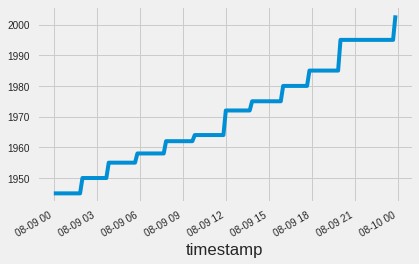

In [59]:
lastday[lastday.category =='IMDb users'].respondents.plot();

In [0]:
final = df.tail(1)

In [70]:
#columns = ['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct']

#OR

columns =  [str(i) + '_pct' for i in range(1,11)]
final[columns]

#OR
#data.index.str.replace('_pct', '')

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
data = final[columns].T

In [76]:
data

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


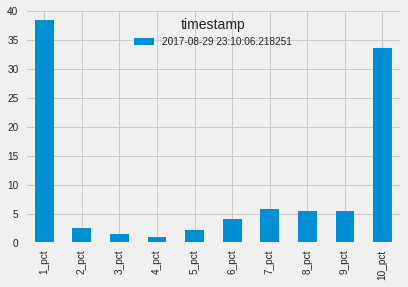

In [72]:
data.plot.bar()

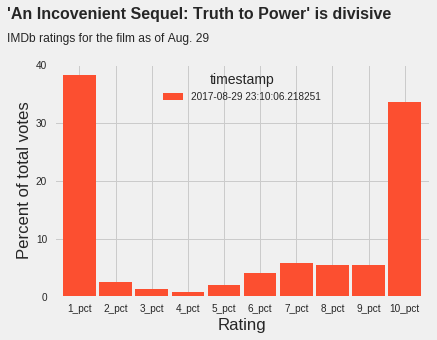

In [74]:
plt.style.use('fivethirtyeight')


ax = data.plot.bar(color='C1', width=0.9)

ax.tick_params(labelrotation=0) 

ax.text(x=-2,y=48,s="'An Incovenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')

ax.text(x=-2,y=44, s='IMDb ratings for the film as of Aug. 29',
       fontsize=12)

ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
      yticks=range(0,50,10)); 
#(start pt., end pt., increment)

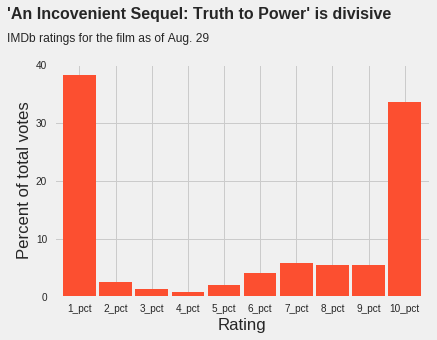

In [75]:
# to remove the timestamp texts in the center
# to change the x axis texts

plt.style.use('fivethirtyeight')


ax = data.plot.bar(color='C1', width=0.9, legend=False)

ax.tick_params(labelrotation=0) 

ax.text(x=-2,y=48,s="'An Incovenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')

ax.text(x=-2,y=44, s='IMDb ratings for the film as of Aug. 29',
       fontsize=12)

ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
      yticks=range(0,50,10)); 


In [0]:
data.index = range(1,11)

data

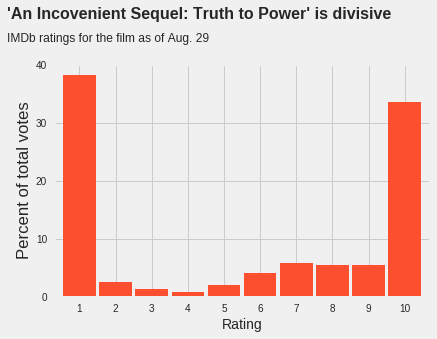

In [83]:
plt.style.use('fivethirtyeight')


ax = data.plot.bar(color='C1', width=0.9, legend=False)

ax.tick_params(labelrotation=0) 

ax.text(x=-2,y=48,s="'An Incovenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')

ax.text(x=-2,y=44, s='IMDb ratings for the film as of Aug. 29',
       fontsize=12)

ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
      yticks=range(0,50,10))

plt.xlabel('Rating', fontsize=14); 

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!







